IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [ ]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [ ]:
#load dataset from GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


WE START WITH DATA SCRAPING SHOT DATA FROM UNDERSTAT. ERLING HAALAND'S PLAYER ID IS 8260 SO WE ADD THAT IN THE BASE URL. THE SITE IS https://understat.com/player/8260

In [ ]:
url ='https://understat.com/player/453'

In [ ]:
html = requests.get(url)

In [ ]:
html.content

b'<!DOCTYPE html>\n<html>\n    <head>\n\t\t<base href="https://understat.com/">\n\t\t<title>Son Heung-Min | Tottenham | xG | Shot Map | Goal stats | Understat.com</title>\n        <meta charset="UTF-8" />\n\t\t<meta name="description" content="Son Heung-Min football stats. xG, shot map, match history. Minutes, goals and assits by club, position, situation.">\n\t\t<meta name="Keywords" content="Son Heung-Min, xG, expected goals, shot map, goals, assists, advanced statistics, match history, football stats"> \n\t\t\t<link rel="apple-touch-icon" sizes="180x180" href="apple-touch-icon.png">\n\t<link rel="icon" type="image/png" sizes="32x32" href="favicon-32x32.png">\n\t<link rel="icon" type="image/png" sizes="16x16" href="favicon-16x16.png">\n\t<link rel="manifest" href="manifest.json">\n\t<link rel="mask-icon" href="safari-pinned-tab.svg" color="#5bbad5">\n\t<meta name="apple-mobile-web-app-title" content="understat">\n\t<meta name="application-name" content="understat">\n\t<meta name="the

In [ ]:
parse_soup = soup(html.content,'lxml')

In [ ]:
scripts = parse_soup.find_all('script')
len(scripts)

25

A QUICK GLANCE AND WE FIND THE NECESSARY DATA(SHOTSDATA) IS INDEX 3. SO WE EXTRACT FROM THAT DICTIONARY.

In [ ]:
scripts[3].string

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2224377\\x22,\\x22minute\\x22\\x3A\\x2253\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.89\\x22,\\x22Y\\x22\\x3A\\x220.629000015258789\\x22,\\x22xG\\x22\\x3A\\x220.08518019318580627\\x22,\\x22player\\x22\\x3A\\x22Son\\x20Heung\\x2DMin\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x22453\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x225453\\x22,\\x22h_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22a_team\\x22\\x3A\\x22Bayer\\x20Leverkusen\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D23\\x2017\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Stefan\\x20Kie\\x5Cu00dfling\\x22,\\x22lastAction\\x22\\x3A\\x22HeadPass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2224858\\x22,\\x22minute\\x22\\x3A\\x2272\\x22,\\x22result

In [ ]:
strings = scripts[3].string

In [ ]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

json_data

'[{"id":"24377","minute":"53","result":"BlockedShot","X":"0.89","Y":"0.629000015258789","xG":"0.08518019318580627","player":"Son Heung-Min","h_a":"a","player_id":"453","situation":"OpenPlay","season":"2014","shotType":"LeftFoot","match_id":"5453","h_team":"Borussia Dortmund","a_team":"Bayer Leverkusen","h_goals":"0","a_goals":"2","date":"2014-08-23 17:30:00","player_assisted":"Stefan Kie\\u00dfling","lastAction":"HeadPass"},{"id":"24858","minute":"72","result":"Goal","X":"0.8040000152587891","Y":"0.3920000076293945","xG":"0.03871903568506241","player":"Son Heung-Min","h_a":"h","player_id":"453","situation":"OpenPlay","season":"2014","shotType":"LeftFoot","match_id":"5411","h_team":"Bayer Leverkusen","a_team":"Werder Bremen","h_goals":"3","a_goals":"3","date":"2014-09-12 19:30:00","player_assisted":"Tin Jedvaj","lastAction":"Pass"},{"id":"24860","minute":"82","result":"BlockedShot","X":"0.789000015258789","Y":"0.47200000762939454","xG":"0.05369637906551361","player":"Son Heung-Min","h_a

In [ ]:
data = json.loads(json_data)
data

[{'X': '0.89',
  'Y': '0.629000015258789',
  'a_goals': '2',
  'a_team': 'Bayer Leverkusen',
  'date': '2014-08-23 17:30:00',
  'h_a': 'a',
  'h_goals': '0',
  'h_team': 'Borussia Dortmund',
  'id': '24377',
  'lastAction': 'HeadPass',
  'match_id': '5453',
  'minute': '53',
  'player': 'Son Heung-Min',
  'player_assisted': 'Stefan Kießling',
  'player_id': '453',
  'result': 'BlockedShot',
  'season': '2014',
  'shotType': 'LeftFoot',
  'situation': 'OpenPlay',
  'xG': '0.08518019318580627'},
 {'X': '0.8040000152587891',
  'Y': '0.3920000076293945',
  'a_goals': '3',
  'a_team': 'Werder Bremen',
  'date': '2014-09-12 19:30:00',
  'h_a': 'h',
  'h_goals': '3',
  'h_team': 'Bayer Leverkusen',
  'id': '24858',
  'lastAction': 'Pass',
  'match_id': '5411',
  'minute': '72',
  'player': 'Son Heung-Min',
  'player_assisted': 'Tin Jedvaj',
  'player_id': '453',
  'result': 'Goal',
  'season': '2014',
  'shotType': 'LeftFoot',
  'situation': 'OpenPlay',
  'xG': '0.03871903568506241'},
 {'X': 

In [ ]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [ ]:
columns = ['X','Y','xG','Result','Season']
df_understat = pd.DataFrame([x, y, xg, result, season], index=columns)
df_understat

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
X,0.89,0.8040000152587891,0.789000015258789,0.8930000305175781,0.8219999694824218,0.89,0.740999984741211,0.8730000305175781,0.905,0.715,...,0.855999984741211,0.7930000305175782,0.9069999694824219,0.8780000305175781,0.8569999694824219,0.85,0.855999984741211,0.8619999694824219,0.8690000152587891,0.88
Y,0.629000015258789,0.3920000076293945,0.47200000762939454,0.32099998474121094,0.33599998474121096,0.29100000381469726,0.580999984741211,0.2520000076293945,0.6759999847412109,0.47400001525878904,...,0.5220000076293946,0.3629999923706055,0.4879999923706055,0.6020000076293945,0.6759999847412109,0.5029999923706054,0.549000015258789,0.4620000076293945,0.56,0.5420000076293945
xG,0.08518019318580627,0.03871903568506241,0.05369637906551361,0.05749652162194252,0.0458788126707077,0.05091371014714241,0.018911978229880333,0.03157151862978935,0.08700913190841675,0.04682279750704765,...,0.31938305497169495,0.029963931068778038,0.4600827395915985,0.3187369108200073,0.08211877942085266,0.06764793395996094,0.3804153501987457,0.12158796191215515,0.10183309763669968,0.08684808015823364
Result,BlockedShot,Goal,BlockedShot,Goal,MissedShots,MissedShots,BlockedShot,BlockedShot,SavedShot,ShotOnPost,...,Goal,SavedShot,Goal,MissedShots,BlockedShot,Goal,Goal,Goal,BlockedShot,BlockedShot
Season,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021


In [ ]:
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')
df_understat

,X,Y,xG,Result,Season
0,0.890,0.629,0.085180,BlockedShot,2014
1,0.804,0.392,0.038719,Goal,2014
2,0.789,0.472,0.053696,BlockedShot,2014
3,0.893,0.321,0.057497,Goal,2014
4,0.822,0.336,0.045879,MissedShots,2014
...,...,...,...,...,...
546,0.850,0.503,0.067648,Goal,2021
547,0.856,0.549,0.380415,Goal,2021
548,0.862,0.462,0.121588,Goal,2021
549,0.869,0.560,0.101833,BlockedShot,2021


In [ ]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat

,X,Y,xG,Result,Season
0,89.000000,62.900002,0.085180,BlockedShot,2014
1,80.400002,39.200001,0.038719,Goal,2014
2,78.900002,47.200001,0.053696,BlockedShot,2014
3,89.300003,32.099998,0.057497,Goal,2014
4,82.199997,33.599998,0.045879,MissedShots,2014
...,...,...,...,...,...
546,85.000000,50.299999,0.067648,Goal,2021
547,85.599998,54.900002,0.380415,Goal,2021
548,86.199997,46.200001,0.121588,Goal,2021
549,86.900002,56.000000,0.101833,BlockedShot,2021


CONGRATULATIONS, THE UNDERSTAT DATA HAS BEEN SCRAPED. NOW MOVING TO FBREF. WE TAKE THE DATA FROM THE BIG 5 LEAGUES COMBINED SHOOTING TABLE LOCATED AT https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats

In [ ]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [ ]:
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [ ]:
df_fbref

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,ENG,DF,Norwich City,Premier League,22-104,2000,26.6,0,11,...,20.3,0,0,0,0.7,0.7,0.06,-0.7,-0.7,Matches
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34-202,1987,27.1,1,17,...,18.4,0,0,0,1.2,1.2,0.07,-0.2,-0.2,Matches
3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22-023,2000,24.6,1,18,...,20.3,0,0,0,0.8,0.8,0.04,0.2,0.2,Matches
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29-076,1993,27.2,0,24,...,22.1,0,0,0,1.8,1.8,0.08,-1.8,-1.8,Matches
5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22-006,2000,0.5,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23-075,1999,22.8,1,14,...,16.1,0,0,0,1.2,1.2,0.09,-0.2,-0.2,Matches
2838,Szymon Żurkowski,POL,MF,Empoli,Serie A,24-205,1997,21.2,5,43,...,18.5,0,0,0,3.8,3.8,0.09,1.2,1.2,Matches
2839,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23-122,1998,24.0,6,40,...,20.0,9,0,0,3.9,3.9,0.10,2.1,2.1,Matches


 NOW WE NEED TO DOWNLOAD TWO PACKAGES MPLSOCCER AND HIGHLIGHT-TEXT

The documentation for mplsoccer is at https://mplsoccer.readthedocs.io/en/latest/gallery/index.html while that for highlight-text is at https://pypi.org/project/highlight-text/#:~:text=the%20examples%20below.-,Use,the%20figure%20in%20figure%20coordinates.

In [ ]:
!pip install mplsoccer
!pip install highlight-text

     |████████████████████████████████| 57 kB 2.8 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=11473553e630b98af544ac4718926e31df4b78befc461beb558bca679c403346
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [ ]:
from highlight_text import ax_text,fig_text
import mplsoccer

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [ ]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

FINALLY WE USE THE OOPS API OF PYTHON TO PLOT OUR VIZ

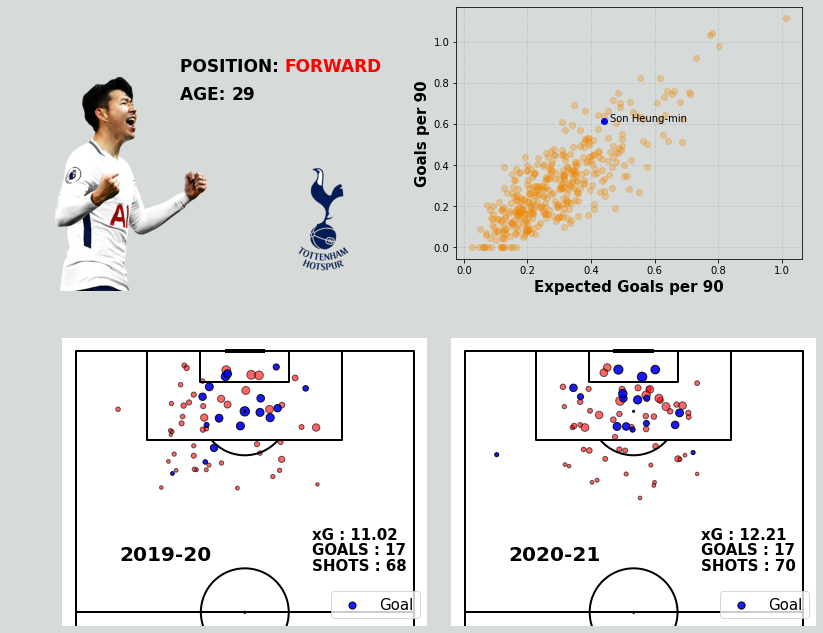

In [ ]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='white', line_color='black')
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2020]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='red', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='blue', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(30,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(30,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(30,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(87, 60, '2019-2020', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2021]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='red', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='blue', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(30,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(30,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(30,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(87, 60, '2020-21', weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING ERLING HAALAND'S DATA
df_player = df_fil[df_fil['Player']=='Son Heung-min']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

a = df_player['xG']/df_player['90s']
b =  df_player['Gls']/df_player['90s']

for i, label in enumerate(df_player['Player']):
    plt.annotate(label, (a+0.02, b))
# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING HAALAND'S IMAGE
ax_player = fig.add_axes([0,0.45,0.25,0.45])
ax_player.axis('off')
im = plt.imread('drive/My Drive/DS/stats/Son/son.png')
ax_player.imshow(im)

# ADDING TITLES AND INFO
fig_text(0.30,0.99,"<SON Heung Min> Finishing in EPL",weight='heavy', size=20, highlight_textprops=[{'color':'blue'}])
fig_text(0.45,0.95,"Comparasion with  <Forward> players in Big 5 European Leagues ",weight='heavy', size=12, highlight_textprops=[{'color':'red'}])
fig_text(0.20,0.85,'POSITION: <FORWARD>',weight='bold', size=17, highlight_textprops=[{'color':'red'}])
fig_text(0.20,0.81,'AGE: <29>',weight='bold', size=17, highlight_textprops=[{'color':'black'}])
# ADDING CLUB LOGO
ax_team = fig.add_axes([0.29,0.55,0.15,0.15])
ax_team.axis('off')
im = plt.imread('drive/My Drive/DS/stats/Son/tot.png')
ax_team.imshow(im)

# ADDING A FOOTER
fig_text(0.01,0.05,'Made by @Firmansyah | template by @khatri_shreyas.\nData from Fbref.com and Understat.com', size=12, weight = 'bold')

plt.savefig('drive/My Drive/DS/stats/Son/Son_viz.png',dpi=300,facecolor=background)

CONGRATULATIONS, YOU HAVE SUCCESSFULLY MADE YOURSELF THIS AMAZING VIZUALISATION